

The date we expect Didymos to fade back to normal is: 2022.802675933832

Didymos is fading at a rate of 0.0579 plus/minus 5e-05 magnitudes per day



<Figure size 2560x1920 with 0 Axes>

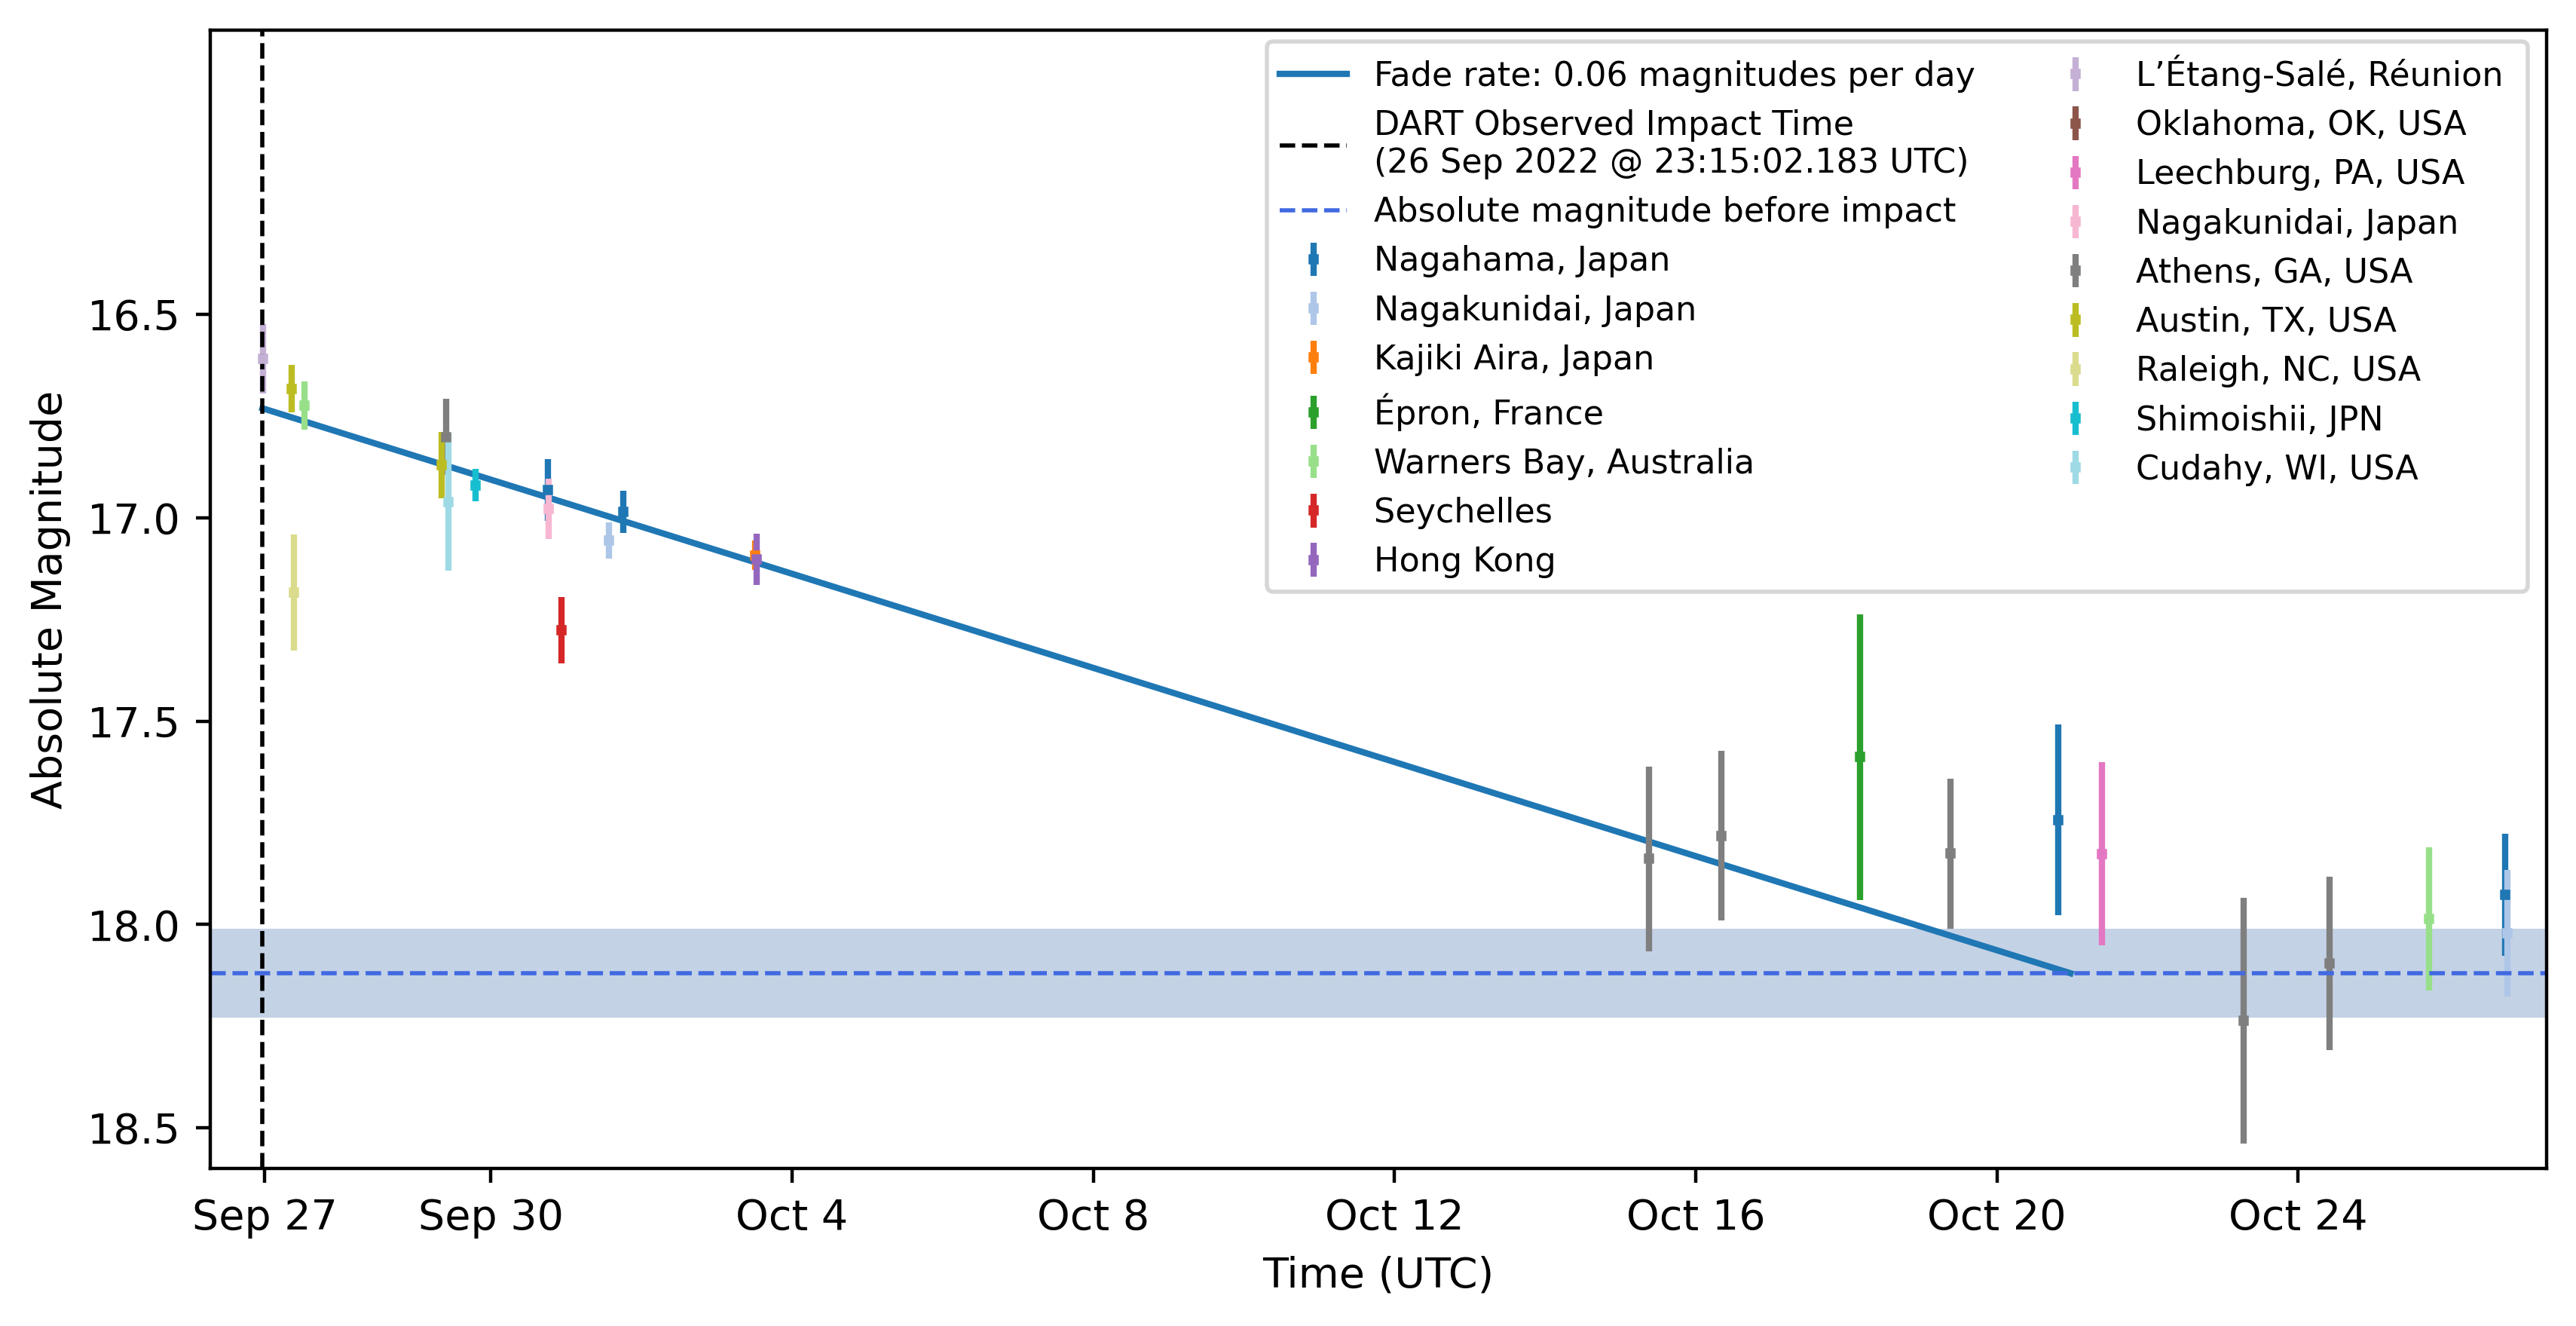

In [38]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

###################
# IMPORT PACKAGES #
###################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import sympy
###################
# USER PARAMETERS #
###################

Uni_data_path = 'Figure_3_fading.csv'

#############
# LOAD DATA #
#############

# Data Unistellar to fit
data_uni_fit = np.array(pd.read_csv(Uni_data_path,header=0))
date_uni_data_fit = data_uni_fit[:,0]
mag_uni_data_fit = data_uni_fit[:,8]
sn = data_uni_fit[:,2]
mag_err_fit = data_uni_fit[:,4]

print()
#################
# straight line #
#################

from scipy.optimize import curve_fit

fading_path = 'Figure_3_fading_fit.csv'

fading = np.array(pd.read_csv(fading_path,header=0))
mag_fading = fading[:,8]
date_fading = fading[:,0]
err_fading = fading[:,4]

err_fading = np.array([sympy.N(i) for i in err_fading],dtype=float)

#print(mag_fading)
#print(date_fading)

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

popt, pcov = curve_fit(f, date_fading, mag_fading, sigma=(err_fading)**2, absolute_sigma=True) # your data x, y to fit

absolute_mag_before = 18.12
Faded_date_abs = (absolute_mag_before-popt[1])/popt[0]
print()
print('The date we expect Didymos to fade back to normal is:',Faded_date_abs)
y_int = popt[1]
slope = popt[0]
error=pcov[1,1]
#print(pcov)
print()
print("Didymos is fading at a rate of",round(popt[0]/365,4),"plus/minus",round(pcov[0,0]/365,5),"magnitudes per day")
print()

############
# PLOTTING #
############


#plt.plot(date_data,mag_data,'.y')
plt.figure(dpi=400,figsize=[6.4, 4.8])
ax = plt.figure(dpi=400,figsize=[10, 5]).gca()

#plt.plot(date_fading, f(date_fading, *popt), 'r-', lw=1)
#ax.axline((0,y_int), slope=slope,color='C0',label='fading fit')
#ax.axline((0,y_int), slope=slope,color='C0',label='Slope: 0.05 magnitudes per day; \nPredicted faded date: Oct 22 at 15:32 UTC')
x1 = Faded_date_abs
x2 = Faded_date_abs+1
#plt.axvspan(x1, x2, color='lightgray', alpha=0.75, lw=0)

Y = slope*2022.73690068493+y_int

#plt.axline((2022.73690068493,Y),(x1,17.858), color = 'blue')
x_values = [2022.73690068493, x1]
y_values = [Y, 18.12]
plt.plot(x_values, y_values, color='tab:blue',label='Fade rate: 0.06 magnitudes per day')

# Unistellar Unique SN/Name plotting #
unique_sn = list(set(sn))
color = cm.tab20(np.linspace(0, 1, len(unique_sn)))

for i in range(0,len(unique_sn)):
    x_tmp = []
    y_tmp = []
    err_tmp=[]
    for j in range(0,sn.shape[0]):
        if sn[j]==unique_sn[i]:
            x_tmp.append(date_uni_data_fit[j])
            y_tmp.append(mag_uni_data_fit[j])
            err_tmp.append(mag_err_fit[j])
    ax.errorbar(x_tmp,y_tmp,yerr=err_tmp,label=unique_sn[i],marker='s',markersize=1.5,linestyle='',color=color[i])

plt.axvline(x = 2022.73690068493, color = 'black', label = 'DART Observed Impact Time\n(26 Sep 2022 @ 23:15:02.183 UTC)', linestyle = 'dashed', lw = 1) #JULIE BELLEROSE communication

plt.axhline(y = 18.12, color = 'royalblue', label = 'Absolute magnitude before impact', linestyle = 'dashed', lw = 1)
#plt.axhline(y = 16.348, color = 'teal', label = 'Average Absolute magnitude after impact', linestyle = 'dashed', lw = 1)

y1 = 18.12+0.11
y2 = 18.12-0.11
plt.axhspan(y1, y2, color='lightsteelblue', alpha=0.75, lw=0)

# Plot Details #
#plt.title('Light Curve of Didymos')
plt.xlabel('Time (UTC)')
plt.ylabel('Absolute Magnitude')
plt.legend(loc="upper left",bbox_to_anchor=(0.445,1.005),fontsize=8,ncol=2)
plt.ylim([15.8,18.6])
plt.yticks([16.5,17,17.5,18,18.5])
#ax.tick_params(axis='y', colors='white')

plt.xlim([2022.735,2022.82])

plt.xticks([2022.73698630137,
2022.74520547945,
2022.75616438356,
2022.76712328767,
2022.77808219178,
2022.78904109589,
2022.8,
2022.81095890411],['Sep 27','Sep 30','Oct 4','Oct 8','Oct 12','Oct 16','Oct 20','Oct 24'])

plt.gca().invert_yaxis()

In [33]:
import math

########################################
#          Fast Moving Ejecta          #
########################################

###################
# DART Parameters #
###################

DART_speed_m_s = 6144.9 # .3
DART_mass_kg = 579.4 # ± 0.7

#####################################
#  Parameters of Dimorphos/Didymos #
#####################################

dust_size = 1.0e-6 #change based on test-case
#dust_size = 1.0e-7 #alternate test-case
#dust_size = 1.0e-5 #alternate test-case

# Geometric albedo of Didymos = 0.16 (Pravec et al. 2006) - 0.15 pm 0.02 Daly et al. 2023
density_didymos = (2400) #kg/m^3 pm 250 kg/m^3 Daly et al. 2023
Dimorphos_mass = 4.3e9 #Daly et al. 2023
Didymos_mass = 5.6e11-Dimorphos_mass # pm 0.5e11 Daly et al. 2023

########################
# Speed of fast ejecta #
########################

peak_date = 2022.7377668874
settle_date = 2022.73779146251
one_sec=0.00000003

time_ap_radius_sec = (settle_date-peak_date)*(3.154e+7) 

print('The initial ejecta took',round(time_ap_radius_sec,2),'seconds to leave the aperture radius')

radius_pix = 8 #photmetry aperture radius
radius_arcsec = radius_pix*1.7082 #eVscope pixel scale
print()
print ('The radius of the aperture in arcseconds is',round(radius_arcsec,2),'"')

earth_dist=0.0756 #AU on SPetmeber 26, 2022
radius_AU = round(earth_dist*math.tan((radius_arcsec*0.000277778)*(math.pi/180)),10)
radius_km = round(radius_AU*1.496e+8,4)

print()
print('At the distance of Didymos, which was',earth_dist,'AU on Sep. 26, 2022, This corresponds to a \ndistance of', round(radius_km,2),'km.')
print()

speed_km_s = round(radius_km/time_ap_radius_sec,3)
speed_m_s = round(speed_km_s*1000,0)

speed_km_s_max = round(radius_km/time_ap_radius_sec_max,3)
speed_m_s_max = round(speed_km_s_max*1000,0)

speed_km_s_min = round(radius_km/time_ap_radius_sec_min,3)
speed_m_s_min = round(speed_km_s_min*1000,0)

print('The intial ejecta moved at speed of',speed_m_s,'m/s on the plane of the sky')
#######################################
#  cross sections before, peak, after #
#######################################

# calculate these based on absolute magnitudes before, at peak, and just after  fast ejecta settles

cross_sec_1=4.35282569326691#error 0.13 (~3%)
cross_sec_2=2.17355821444981 #error 0.09 (~4%)
cross_sec_3=0.530604924602527 #error 0.06 (~11%)


#######################################
#  Mass based on cross sections 1 - 2 #
#######################################

# M = (4/3)*density*dust_size*C #

change_C = (cross_sec_1-cross_sec_2)*1000000 #in m^2
change_M = (4/3)*density_didymos*dust_size*change_C #in kg
print()
print('The mass in the fast moving ejecta is',round(change_M,2),'kg')

##################################
#  Kinetic energy of fast ejecta #
##################################

energy = 0.5*change_M*speed_m_s**2
print()
print ('the kinetic energy of the fast moving ejecta is', round(energy,2), 'Joules')

DART_kinetic_energy = 10940000000 #Daly et al. 2023

print()
print('The kinetic energy of the DART spaceraft at the time of impact is',round(DART_kinetic_energy,8),'Joules')

print()
percent_energy=round((energy/DART_kinetic_energy)*100,8)
print(percent_energy,'% of the energy from the impactor went into the fast moving ejecta')

The initial ejecta took 775.1 seconds to leave the aperture radius

The radius of the aperture in arcseconds is 13.67 "

At the distance of Didymos, which was 0.0756 AU on Sep. 26, 2022, This corresponds to a 
distance of 749.3 km.

The intial ejecta moved at speed of 967.0 m/s on the plane of the sky

The mass in the fast moving ejecta is 6973.66 kg

the kinetic energy of the fast moving ejecta is 3260494476.0 Joules

The kinetic energy of the DART spaceraft at the time of impact is 10940000000 Joules

29.803423 % of the energy from the impactor went into the fast moving ejecta


In [43]:
####################################################
# velocity for a particle based of fading estimate #
####################################################
change_C_slow = (cross_sec_2-cross_sec_3)*1000000

time_predicted = (Faded_date_abs-peak_date)*365*24*60*60 #as estimated by absolute mags
time_predicted_days = (Faded_date_abs-peak_date)*365
print()
print('The predicted time to fade out of the aperture is:',round(time_predicted_days,2),'days')

v_predicted = (radius_km*1000)/time_predicted
print()
print('The predicted velocity of the slow particles is therefore',v_predicted,'m/s')



change_M_slow_predicted = DART_mass_kg*0.01*(v_predicted/DART_speed_m_s)**(-1.5)
print(DART_mass_kg)

print()
print('The predicted mass of the ejecta based on fading time is',round(change_M_slow_predicted,2),'kg')


##############################
#  Dust size based on fading #
##############################

dust_size = 3*change_M_slow_predicted/change_C_slow/3480/4
print()
print('The predicted dust size is:')
print(round(dust_size,3), 'm')
print(round(dust_size*1000,3),'mm')
print(round(dust_size*1000000,2),'microns')


##########################
#  Mass  based on fading #
##########################

print()
print('The mass of Dimorphos is',Dimorphos_mass,'kg')
print()
print('The predicted mass loss contained in the slow moving ejecta based on fading speed is:\n', round(change_M_slow_predicted,0), 'kg')
print()
print('The mass loss contained in the fast moving ejecta:', round(change_M,2), 'kg')

total_mass_loss_predicted = change_M+change_M_slow_predicted
print()
print('The total predicted mass loss is',round(total_mass_loss_predicted,2),'kg')
print('The percent of predicted mass lost from Dimorphos is',round((total_mass_loss_predicted/Dimorphos_mass)*100,5),'%')

energy_slow = (1/2)*change_M_slow_predicted*v_predicted
print()
print('The energy carried by the slow moving ejecta is',round(energy_slow,2),'Joules')



print()
change_M_slow_predicted_2 = (4/3)*(change_C_slow)*(density_didymos)*0.0025
print(change_M_slow_predicted_2)
print()
change_M_slow_predicted_2 = (4/3)*(change_C_slow)*(density_didymos)*0.0042
print(change_M_slow_predicted_2)


The predicted time to fade out of the aperture is: 23.69 days

The predicted velocity of the slow particles is therefore 0.3660536705471888 m/s
579.4

The predicted mass of the ejecta based on fading time is 12601828.69 kg

The predicted dust size is:
0.002 m
1.653 mm
1653.07 microns

The mass of Dimorphos is 4300000000.0 kg

The predicted mass loss contained in the slow moving ejecta based on fading speed is:
 12601829.0 kg

The mass loss contained in the fast moving ejecta: 6973.66 kg

The total predicted mass loss is 12608802.34 kg
The percent of predicted mass lost from Dimorphos is 0.29323 %

The energy carried by the slow moving ejecta is 2306472.82 Joules

13143626.318778262

22081292.21554748


In [46]:
##########################
#  Orbit #
##########################

a=1.19 #km
a_m = 1206
P = math.sqrt((4*(math.pi**2)*(a_m**3))/(G*Didymos_mass))
P_new = P-(33*60)
a_m_new = (((P_new**2)*G*Didymos_mass)/(4*math.pi**2))**(1/3)

print()
print('The old semimajor axis of the orbit of Dimorphos around Didymos was',round(a_m,3),'meters')
v_old = math.sqrt((G*Didymos_mass)/a_m)
print('The old orbital velocity of Dimorphos was',round(v_old,3),'m/s')
print()
print('The new semimajor axis of the orbit of Dimorphos around Didymos is',round(a_m_new,3),'meters')
v_new = math.sqrt((G*Didymos_mass)/a_m_new)
print('The new orbital velocity of Dimorphos is',round(v_new,3),'m/s')
print()

Energy_old = -(G*Didymos_mass*Dimorphos_mass)/(2*a_m)

Energy_new = -(G*Didymos_mass*Dimorphos_mass)/(2*a_m_new)

print('The old orbital energy was', round(Energy_old,3))
print('The new orbital energy is',round(Energy_new,3))
print('The difference in orbital energy is',round(Energy_old-Energy_new,3))

kinetic_old = (1/2)*Dimorphos_mass*(v_old**2)

kinetic_new = (1/2)*Dimorphos_mass*(v_new**2)

DART_kinetic_energy = 10940000000 #Daly et al. 2023
print()
print('The kinetic energy of the DART spaceraft at the time of impact is',round(DART_kinetic_energy,2),'Joules')


The old semimajor axis of the orbit of Dimorphos around Didymos was 1206 meters
The old orbital velocity of Dimorphos was 0.175 m/s

The new semimajor axis of the orbit of Dimorphos around Didymos is 1168.883 meters
The new orbital velocity of Dimorphos is 0.178 m/s

The old orbital energy was -66078075.041
The new orbital energy is -68176347.75
The difference in orbital energy is 2098272.709

The kinetic energy of the DART spaceraft at the time of impact is 10940000000 Joules


224
224
224
224


<Figure size 2560x1920 with 0 Axes>

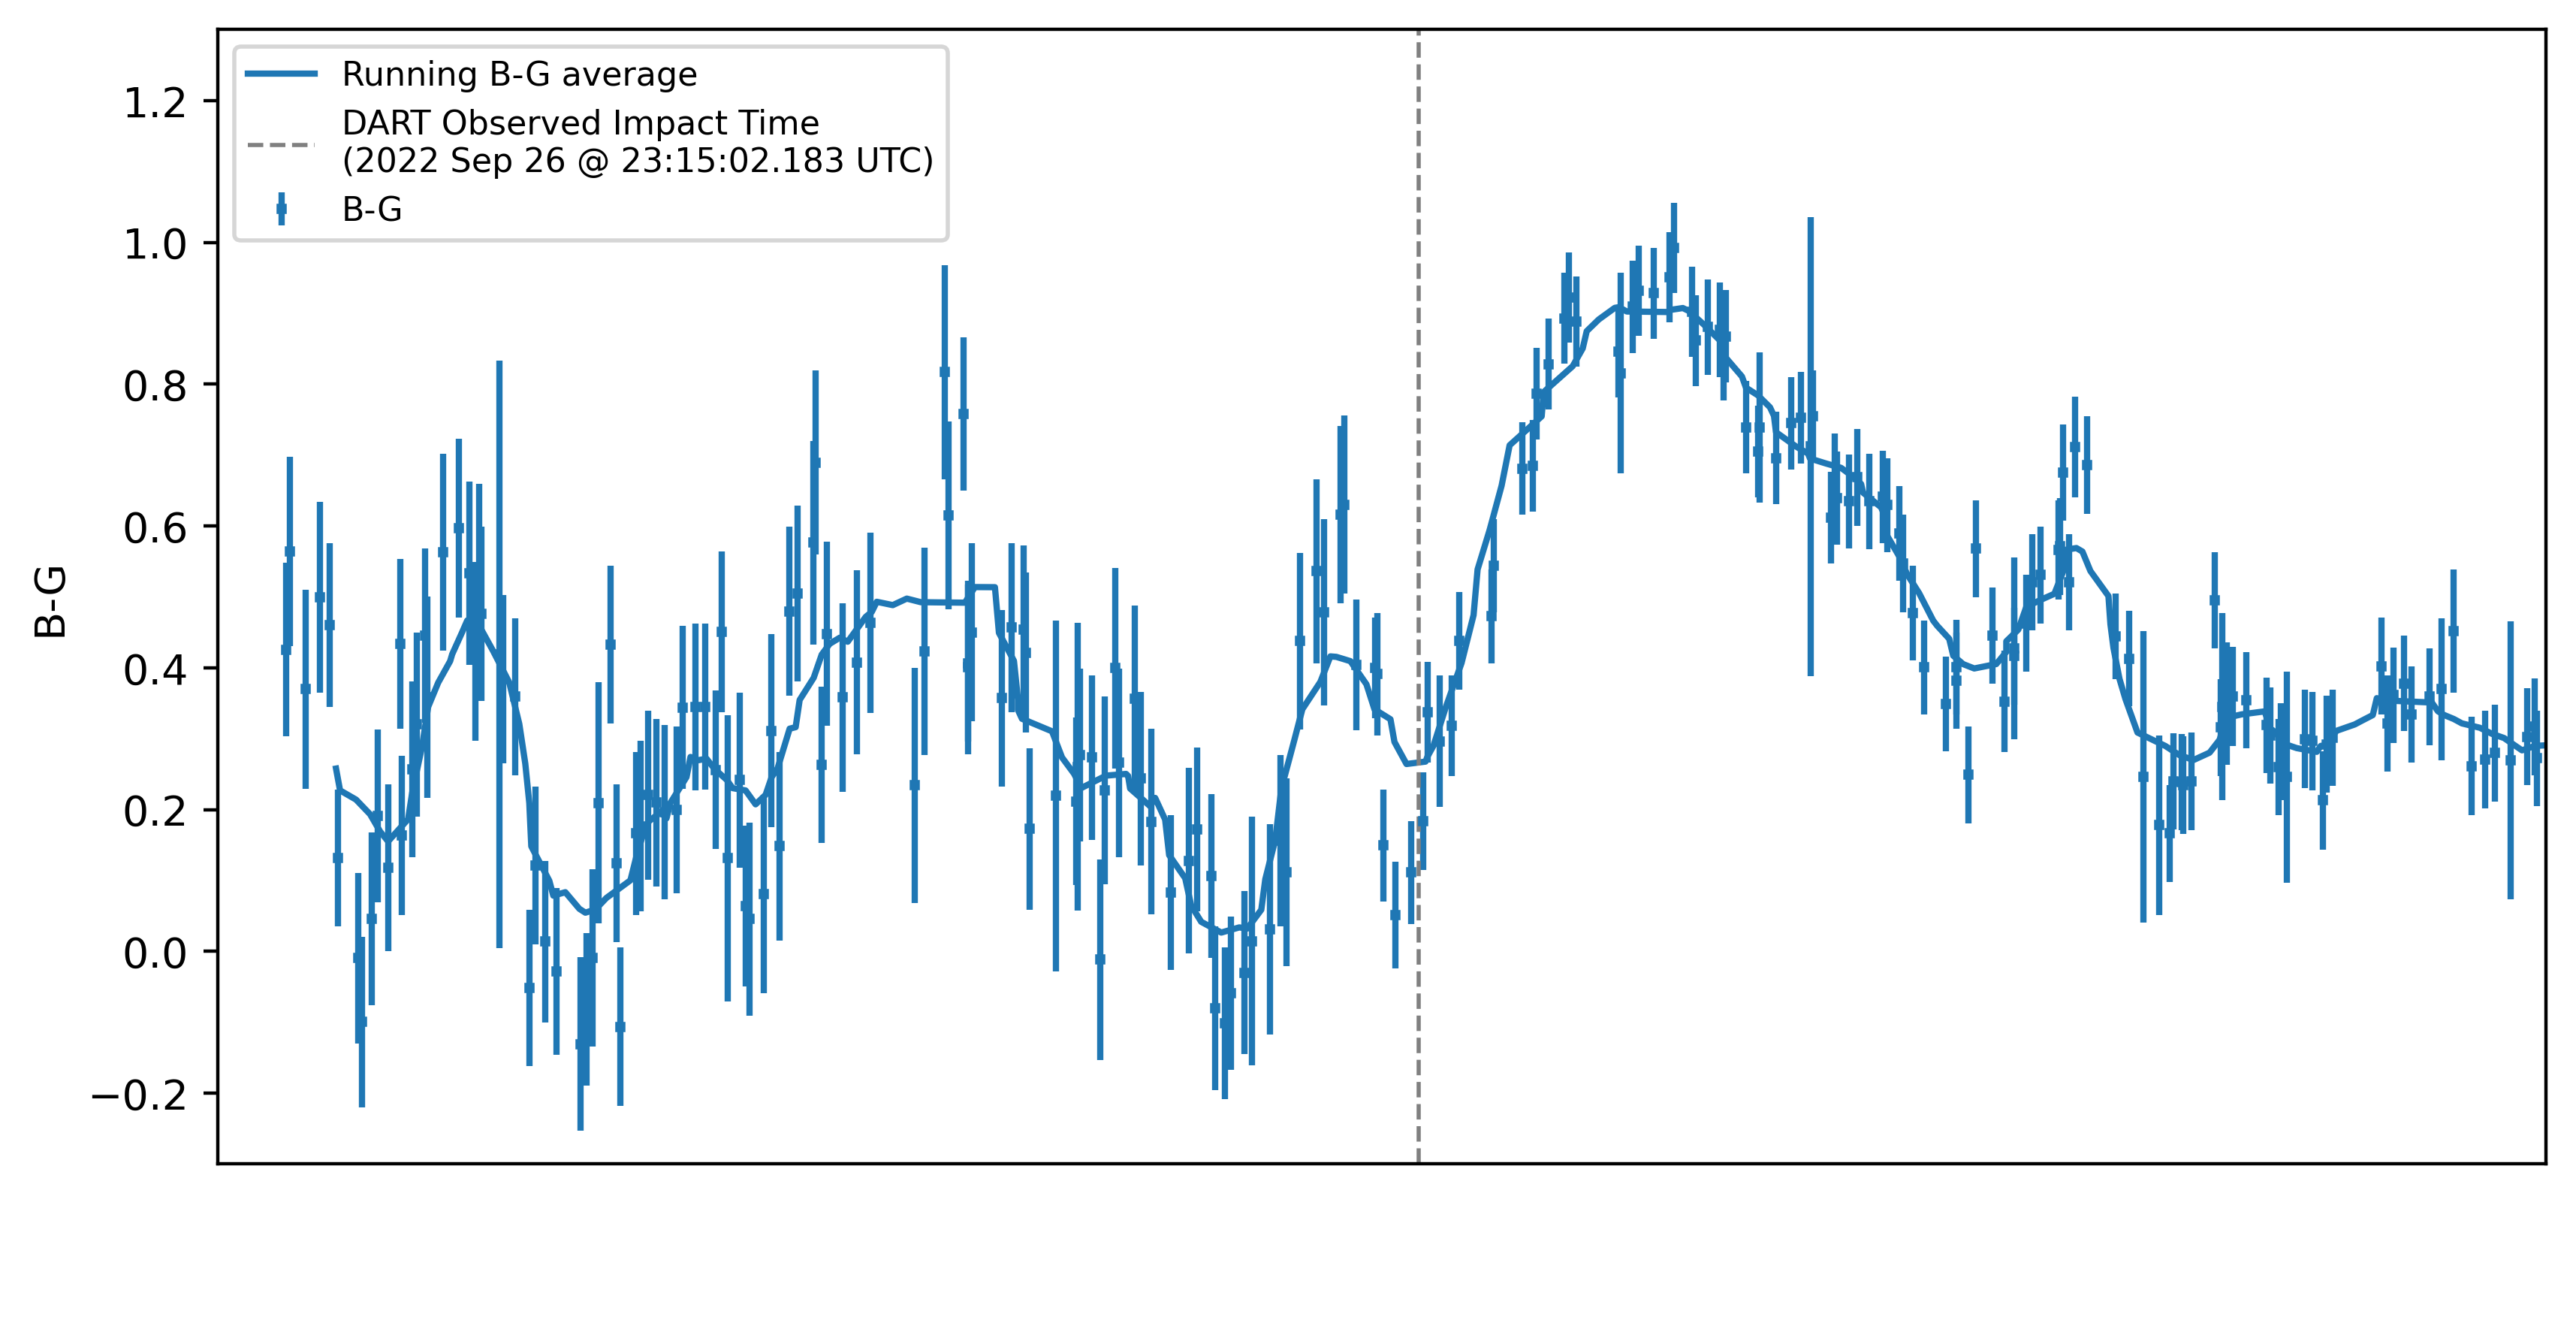

<Figure size 2560x1920 with 0 Axes>

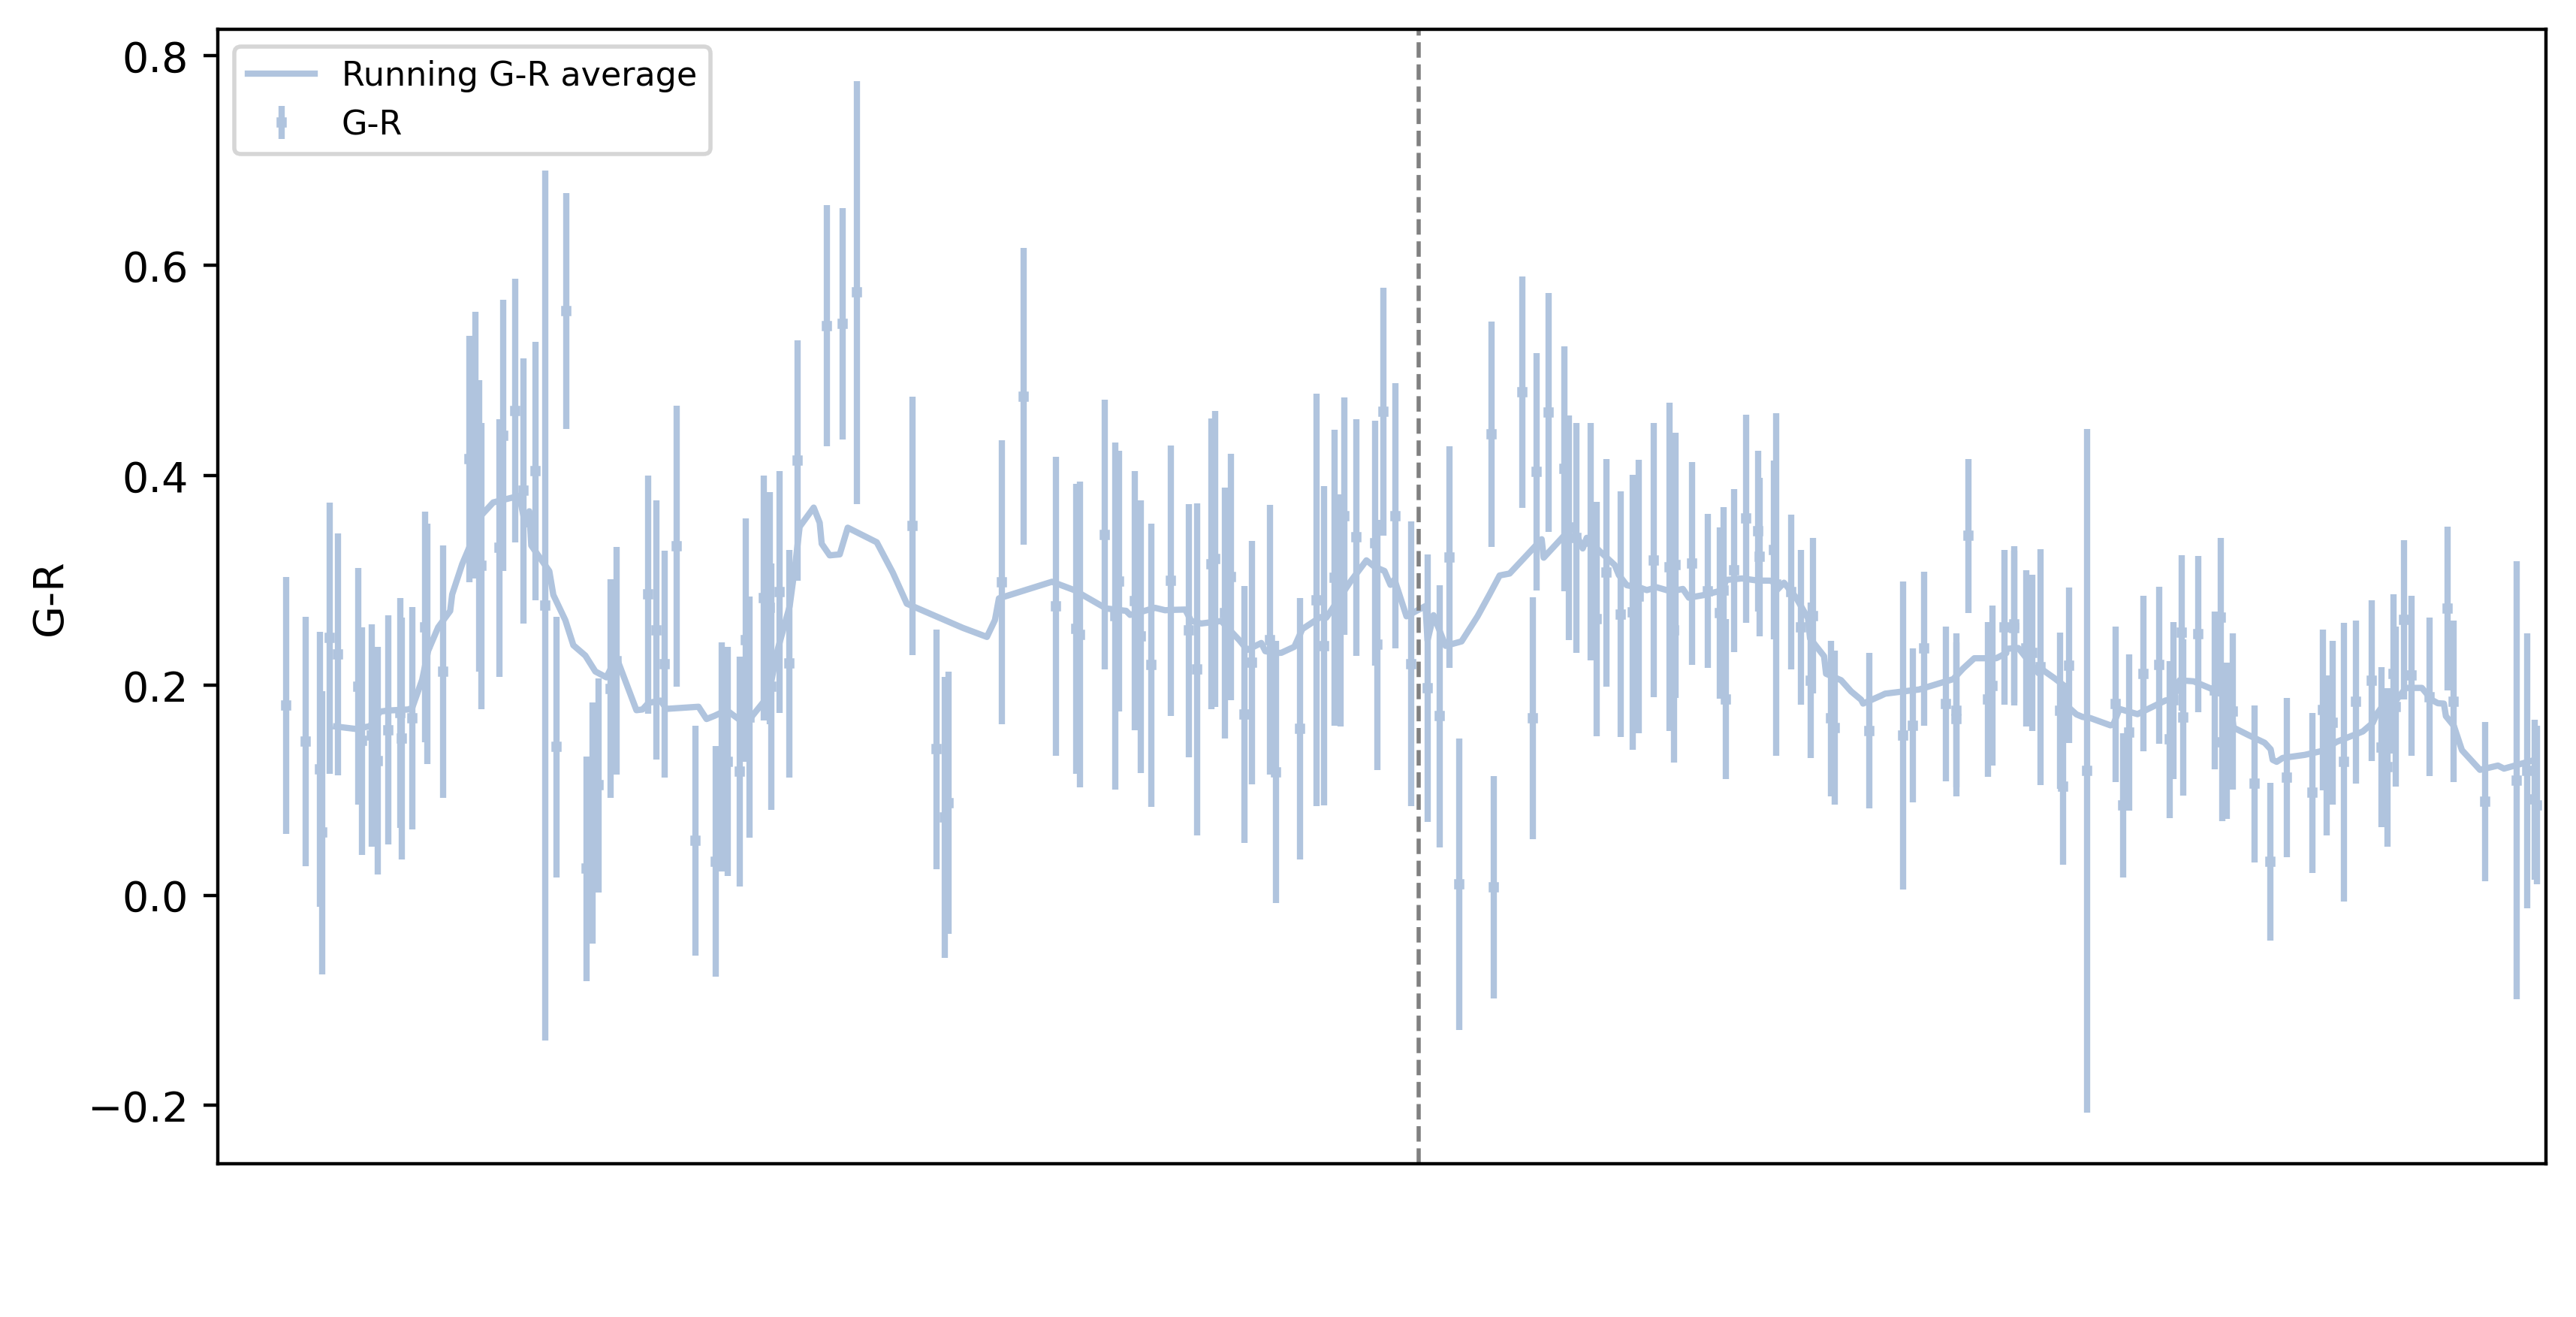

<Figure size 2560x1920 with 0 Axes>

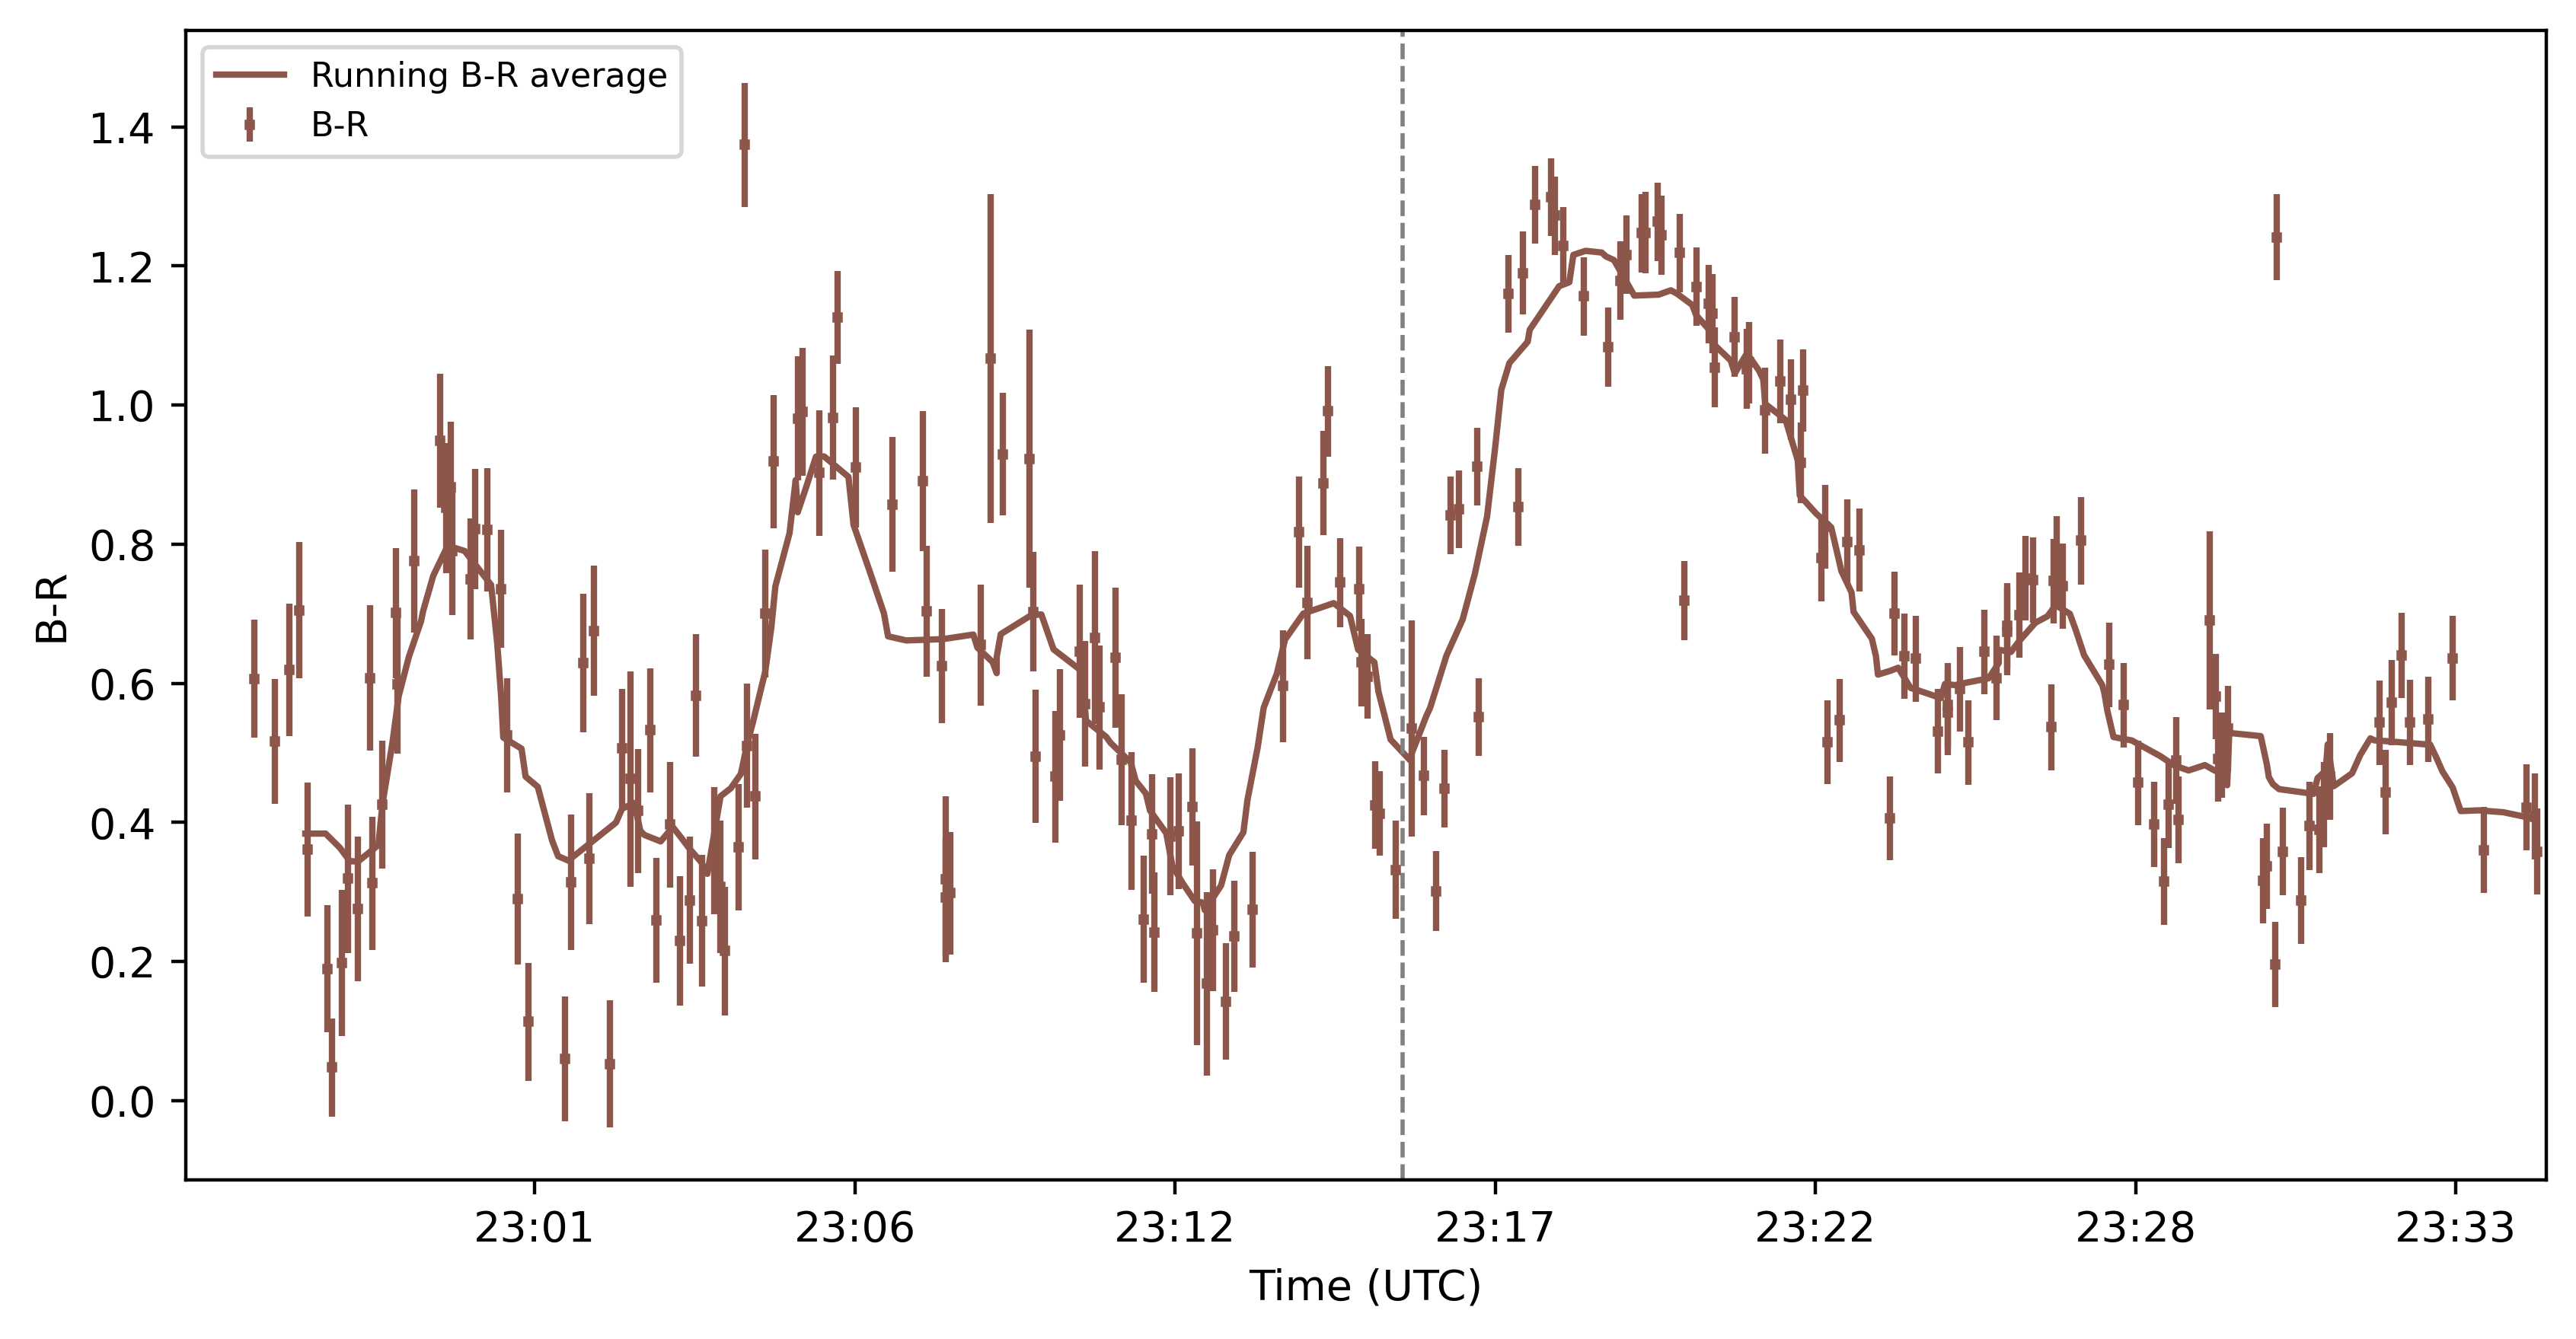

In [52]:
import math
import statistics
###COLORS###

###################
# USER PARAMETERS #
###################
color_path = 'Figure_4_colors.csv'

#############
# LOAD DATA #
#############
# Ephemeris
colors = np.array(pd.read_csv(color_path,header=0))
date_B_V = colors[:,0]
date_V_R = colors[:,3]
date_B_R = colors[:,6]
B_V = colors[:,1]
V_R = colors[:,4]
B_R = colors[:,7]
B_V_error = colors[:,2]
V_R_error = colors[:,5]
B_R_error = colors[:,8]
############
# PLOTTING #
############

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

plt.figure(dpi=400,figsize=[6.4, 4.8])
ax = plt.figure(dpi=400,figsize=[10, 5]).gca()

window = 10
average_y = []
shifted_x = []
for ind in range(len(B_V) - window + 1):
    average_y.append(np.mean(B_V[ind:ind+window]))
    
for ind in range(window - 1):
    average_y.insert(0, np.nan)

for ind in range(len(date_B_V)-window+1):
    shifted_x.append(date_B_V[ind]+0.0000015853)

for ind in range(window - 1):
    shifted_x.insert(0, np.nan)
    
plt.plot(shifted_x, average_y, color='tab:blue', label='Running B-G average')

ax.errorbar(date_B_V,B_V,yerr=B_V_error,label="B-G",marker='s',markersize=1.5,linestyle='',color='tab:blue')

plt.axvline(x = 2022.73776710935, color = 'gray', label = 'DART Observed Impact Time\n(2022 Sep 26 @ 23:15:02.183 UTC)', linestyle = 'dashed', lw = 1) #JULIE BELLEROSE communication

ax.tick_params(axis='x', colors='white')
plt.ylabel('B-G')
plt.ylim([-0.3,1.3])
plt.xlim([2022.7377290893,2022.73780281439])
plt.legend(loc="upper left",bbox_to_anchor=(0,1),fontsize=8,ncol=1)

############
# PLOTTING #
############

print (len(V_R))
print (len(date_V_R))

plt.figure(dpi=400,figsize=[6.4, 4.8])
ax = plt.figure(dpi=400,figsize=[10, 5]).gca()

window = 10
average_y = []
shifted_x = []
for ind in range(len(V_R) - window + 1):
    average_y.append(np.mean(V_R[ind:ind+window]))
    
for ind in range(window - 1):
    average_y.insert(0, np.nan)
    
for ind in range(len(date_V_R)-window+1):
    shifted_x.append(date_V_R[ind]+0.0000015853)

for ind in range(window - 1):
    shifted_x.insert(0, np.nan)

plt.plot(shifted_x, average_y, color='lightsteelblue', label='Running G-R average')

ax.errorbar(date_V_R,V_R,yerr=V_R_error,label="G-R",marker='s',markersize=1.5,linestyle='',color='lightsteelblue')

plt.axvline(x = 2022.73776710935, color = 'gray', linestyle = 'dashed', lw = 1) #JULIE BELLEROSE communication

ax.tick_params(axis='x', colors='white')
plt.ylabel('G-R')
plt.xlim([2022.7377290893,2022.73780281439])
plt.legend(loc="upper left",bbox_to_anchor=(0,1),fontsize=8,ncol=1)

############
# PLOTTING #
############

print (len(B_R))
print (len(date_B_R))

plt.figure(dpi=400,figsize=[6.4, 4.8])
ax = plt.figure(dpi=400,figsize=[10, 5]).gca()

window = 10
average_y = []
shifted_x=[]
for ind in range(len(B_R) - window + 1):
    average_y.append(np.mean(B_R[ind:ind+window]))
    
for ind in range(window - 1):
    average_y.insert(0, np.nan)
    
for ind in range(len(date_B_R)-window+1):
    shifted_x.append(date_B_R[ind]+0.0000015853)

for ind in range(window - 1):
    shifted_x.insert(0, np.nan)
    
plt.plot(shifted_x, average_y, color='tab:brown', label='Running B-R average')

ax.errorbar(date_B_R,B_R,yerr=B_R_error,label="B-R",marker='s',markersize=1.5,linestyle='',color='tab:brown')

plt.axvline(x = 2022.73776710935, color = 'gray', linestyle = 'dashed', lw = 1) #JULIE BELLEROSE communication

plt.xlabel('Time (UTC)')
plt.ylabel('B-R')
plt.xlim([2022.7377290893,2022.73780281439])
x=[2022.73774,2022.73775,2022.73776,2022.73777,2022.73778,2022.73779,2022.73780]
xvalues = ['23:01','23:06','23:12','23:17','23:22','23:28','23:33'] 
plt.xticks(x,xvalues)
plt.legend(loc="upper left",bbox_to_anchor=(0,1),fontsize=8,ncol=1)

([<matplotlib.axis.XTick at 0x7fcdba2b4f10>,
 [Text(2022.73774, 0, '23:01'),
  Text(2022.73775, 0, '23:06'),
  Text(2022.73776, 0, '23:12'),
  Text(2022.73777, 0, '23:17'),
  Text(2022.73778, 0, '23:22'),
  Text(2022.73779, 0, '23:28'),
  Text(2022.7378, 0, '23:33')])

<Figure size 2560x1920 with 0 Axes>

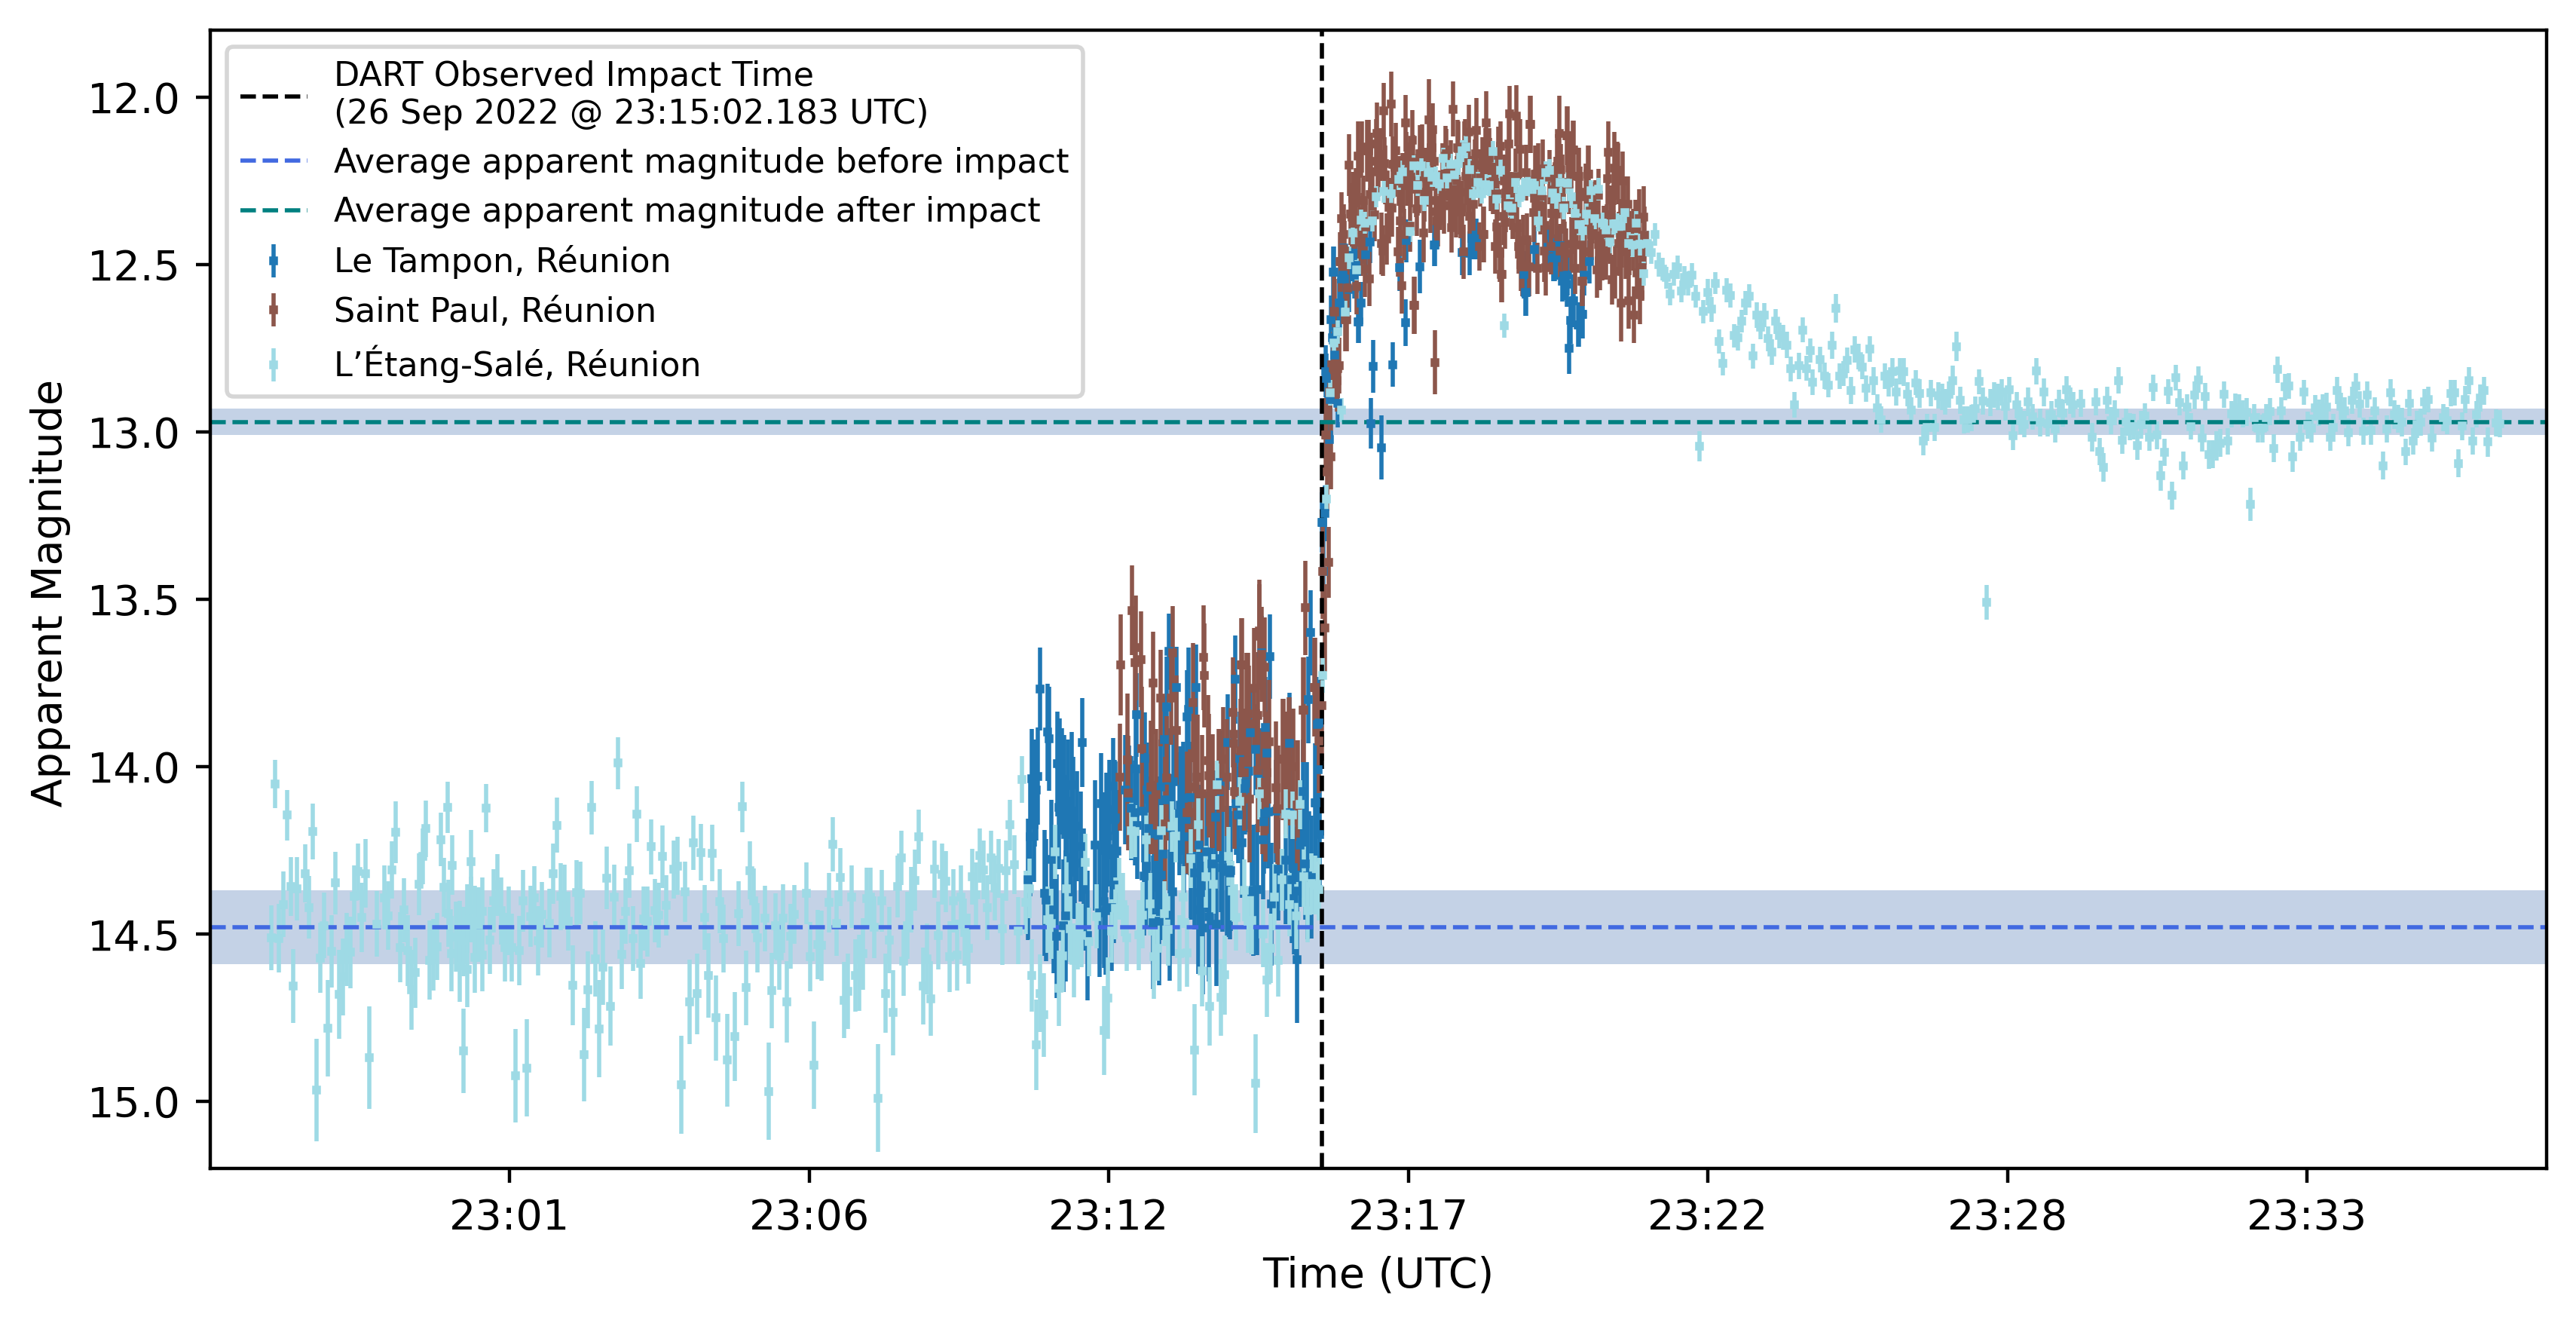

In [55]:
###################
# IMPORT PACKAGES #
###################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

###################
# USER PARAMETERS #
###################
Uni_data_path = 'Figure_2_Impact.csv'

X1_list = np.linspace(0, 20, 200)
X2_list = np.linspace(0, 20, 200)

X1_list_JPL = np.linspace(0, 20, 200)
X2_list_JPL = np.linspace(0, 20, 200)

X1_list_uni = np.linspace(0, 20, 200)
X2_list_uni = np.linspace(0, 20, 200)

X1_list_uni_fit = np.linspace(0, 20, 200)
X2_list_uni_fit = np.linspace(0, 20, 200)

#############
# LOAD DATA #
#############

# Data Unistellar
data_uni = np.array(pd.read_csv(Uni_data_path,header=0))
date_uni_data = data_uni[:,0]
mag_uni_data = data_uni[:,1]
mag_err = data_uni[:,2]
sn = data_uni[:,3]

for i in range(0,sn.shape[0]):
    if isinstance(sn[i],float):
        sn[i] = 'none'
        
plt.figure(dpi=400,figsize=[6.4, 4.8])
ax = plt.figure(dpi=400,figsize=[10, 5]).gca()

# Unistellar Unique SN/Name plotting #
unique_sn = list(set(sn))
color = cm.tab20(np.linspace(0, 1, len(unique_sn)))

for i in range(0,len(unique_sn)):
    x_tmp = []
    y_tmp = []
    err_tmp=[]
    for j in range(0,sn.shape[0]):
        if sn[j]==unique_sn[i]:
            x_tmp.append(date_uni_data[j])
            y_tmp.append(mag_uni_data[j])
            err_tmp.append(mag_err[j])
    ax.errorbar(x_tmp,y_tmp,yerr=err_tmp,label=unique_sn[i],marker='s',markersize=1, elinewidth=1, linestyle='',color=color[i])
    
    window = 17
    average_y = []
    shifted_x = []
    for ind in range(len(y_tmp) - window + 1):
        average_y.append(np.mean(y_tmp[ind:ind+window]))
    
    for ind in range(window - 1):
        average_y.insert(0, np.nan)
    
    for ind in range(len(x_tmp)-window+1):
        shifted_x.append(x_tmp[ind])

    for ind in range(window - 1):
        shifted_x.insert(0, np.nan)

plt.axvline(x = 2022.73776710935, color = 'black', label = 'DART Observed Impact Time\n(26 Sep 2022 @ 23:15:02.183 UTC)', linestyle = 'dashed', lw = 1) #JULIE BELLEROSE communication
plt.axhline(y = 14.48, color = 'royalblue', label = 'Average apparent magnitude before impact', linestyle = 'dashed', lw = 1)
plt.axhline(y = 12.97, color = 'teal', label = 'Average apparent magnitude after impact', linestyle = 'dashed', lw = 1)

y1 = 12.97+0.04
y2 = 12.97-0.04
plt.axhspan(y1, y2, color='lightsteelblue', alpha=0.75, lw=0)

yy1 = 14.48+0.11
yy2 = 14.48-0.11
plt.axhspan(yy1, yy2, color='lightsteelblue', alpha=0.75, lw=0)

    
# Plot Details #
plt.xlabel('Time (UTC)')
plt.ylabel(' Apparent Magnitude')
plt.legend(loc="upper left",bbox_to_anchor=(0,1),fontsize=8,ncol=1)
plt.xlim([2022.73773,2022.737808])
plt.ylim([11.8,15.2])
plt.gca().invert_yaxis()
x=[2022.73774,2022.73775,2022.73776,2022.73777,2022.73778,2022.73779,2022.73780]
xvalues = ['23:01','23:06','23:12','23:17','23:22','23:28','23:33'] 
plt.xticks(x,xvalues)

